In [3]:
print("Hello World")

Hello World


In [7]:
print("Testing how to use jupyter notebook")


Testing how to use jupyter notebook


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
data = fetch_california_housing()
print(data.keys())
print(f"data type is {type(data)}")

#convert data into dataframe
df = pd.DataFrame(data.data, columns=data.feature_names) 
print(f"dataframe type is {type(df)}")
# df.describe()
# df.info()
# df.head()

df['Target'] = data.target


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
data type is <class 'sklearn.utils._bunch.Bunch'>
dataframe type is <class 'pandas.core.frame.DataFrame'>


In [16]:
# split data for training and testing

X = df.drop('Target',axis=1) #means to drop the Target column, as axis=1 represents the column
Y = df['Target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
# training Linear Regression model
model = LinearRegression()

model.fit(X_train,Y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.56
R² Score: 0.58


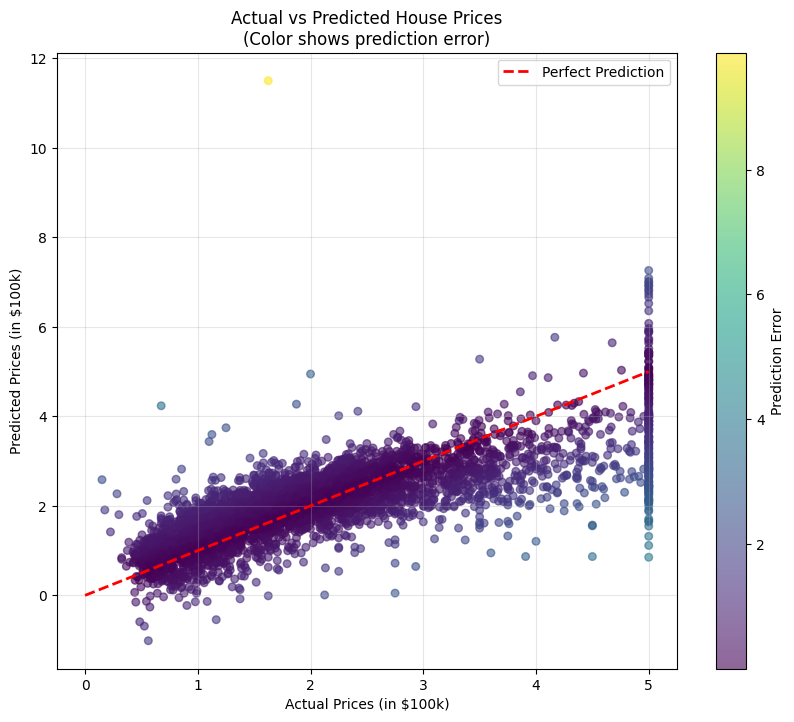

In [24]:
plt.figure(figsize=(10, 8))

# Calculate prediction errors
errors = np.abs(Y_test - y_pred)

# Create scatter plot with color-coded errors
scatter = plt.scatter(Y_test, y_pred, c=errors, cmap='viridis', alpha=0.6, s=30)
plt.colorbar(scatter, label='Prediction Error')
plt.plot([0, 5], [0, 5], '--r', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Prices (in $100k)")
plt.ylabel("Predicted Prices (in $100k)")
plt.title("Actual vs Predicted House Prices\n(Color shows prediction error)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()